In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
! pip install tqdm.notebook

In [ ]:
#explore data
df = pd.read_csv("Resources/Resource1/train_loandata1.csv")
#df.dropna(inplace=True)
df.head()

In [ ]:
#X=df.iloc[:,2:-1]
#X.head()

Prepare categorical variables

In [ ]:
df.dtypes

In [ ]:
# shape
print(df.shape)

In [6]:
#pd.dummies - to convert categorical data to continuous
cat_vars = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
df1 = df[cat_vars].astype(str)
df2 = pd.get_dummies(df1)
df2.to_csv("Resources/Resource1/df2.csv")
df2.head(5)

,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
2,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1
3,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1


In [7]:
#Extract only the columns that didnt need to be encoded
data_other_cols = df.drop(columns=cat_vars)
data_df=data_other_cols.to_csv("Resources/Resource1/data_df.csv")


#merge with dummy columns

In [8]:
pd.read_csv("Resources/Resource1/df2.csv")
df2.head()


,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
2,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1
3,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1


In [9]:
new_df=pd.merge(df,df2,left_index=True, right_index=True)
new_df.to_csv("Resources/Resource1/new_df.csv")
new_df.head()

,Loan_ID,Unnamed: 1,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,...,Dependents_3+,Dependents_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,NaN,Male,No,0,Graduate,No,5849,0.0,360.0,...,0,0,1,0,1,0,0,0,0,1
1,LP001005,NaN,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,...,0,0,1,0,0,1,0,0,0,1
2,LP001006,NaN,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,...,0,0,0,1,1,0,0,0,0,1
3,LP001008,NaN,Male,No,0,Graduate,No,6000,0.0,360.0,...,0,0,1,0,1,0,0,0,0,1
4,LP001011,NaN,Male,Yes,2,Graduate,Yes,5417,4196.0,360.0,...,0,0,1,0,0,1,0,0,0,1


In [10]:
newdataset_df = pd.read_csv("Resources/Resource1/newdataset_df.csv")
newdataset_df.dropna(inplace=True)
newdataset_df
#len(newdataset_df)

,ApplicantIncome,CoapplicantIncome,Credit_History,Female,Male,Gender_nan,Notmarried,Married,0Dependent,1Dependent,2Dependent,3+Dependent,Graduate,Not grad,Notselfemp,Selfempl,Rural,Semiurban,Urban,LoanAmount
1,3000,0.0,1.0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,66.0
2,2583,2358.0,1.0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,120.0
3,6000,0.0,1.0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,141.0
4,5417,4196.0,1.0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,267.0
5,2333,1516.0,1.0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,3232,1950.0,1.0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,108.0
418,2900,0.0,1.0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,71.0
419,4106,0.0,1.0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,40.0
420,8072,240.0,1.0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,253.0


In [11]:
y = df.iloc[:,[-1]]
y.head()

,LoanAmount
0,NaN
1,66.0
2,120.0
3,141.0
4,267.0


In [12]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import pvalues
# create X and y
feature_cols = ['ApplicantIncome', 'Credit_History','Female','Male','Notmarried','Married','0Dependent','1Dependent','2Dependent','3+Dependent','Graduate','Not grad','Selfempl','Rural','Semiurban','Urban']
X = newdataset_df[feature_cols]
y = newdataset_df.LoanAmount

# instantiate and fit
model = LinearRegression()
model.fit(X, y)

# print the coefficients
list(zip(feature_cols, model.coef_))

[('ApplicantIncome', 0.007735342216944865),
 ('Credit_History', -32.260093103321516),
 ('Female', -38.97217488165077),
 ('Male', -37.45872431054538),
 ('Notmarried', -59.38822099045538),
 ('Married', -41.251607073648756),
 ('0Dependent', 13.753317331272438),
 ('1Dependent', 27.325056767375955),
 ('2Dependent', 29.321582759684784),
 ('3+Dependent', 29.81057281066566),
 ('Graduate', 9.166719912078793),
 ('Not grad', -9.166719912078705),
 ('Selfempl', 2.174328581431121),
 ('Rural', 10.088832137684502),
 ('Semiurban', 0.5807365097685488),
 ('Urban', -10.669568647453081)]

In [13]:
# Fitting our model with all of our features in X; initial R^2 low,possibly due to low "n"; will need to scale and optimize model
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.4154290157693863


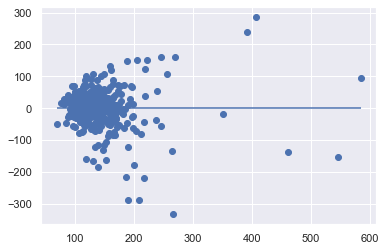

In [14]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [15]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import pvalues
# create X and y
feature_cols = ['ApplicantIncome','Married','Male','1Dependent','2Dependent','3+Dependent','Graduate','Selfempl','Rural',]
X = newdataset_df[feature_cols]
y = newdataset_df.LoanAmount

# instantiate and fit
model1 = LinearRegression()
model1.fit(X, y)

# print the coefficients
list(zip(feature_cols, model1.coef_))

[('ApplicantIncome', 0.007955794250505913),
 ('Married', 18.08555745918845),
 ('Male', -2.7907824791615607),
 ('1Dependent', 12.510699873525873),
 ('2Dependent', 14.680601974016893),
 ('3+Dependent', 19.7219141869105),
 ('Graduate', 18.84139885597126),
 ('Selfempl', -0.20261523701030396),
 ('Rural', 14.117335903301933)]

In [16]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import pvalues
# create X and y
feature_cols = ['ApplicantIncome','Married','1Dependent','2Dependent','3+Dependent','Graduate','Rural']
X = newdataset_df[feature_cols]
y = newdataset_df.LoanAmount

# instantiate and fit
model2 = LinearRegression()
model2.fit(X, y)

# print the coefficients
list(zip(feature_cols, model2.coef_))

[('ApplicantIncome', 0.007969301047216028),
 ('Married', 17.335828717716822),
 ('1Dependent', 12.63338764483088),
 ('2Dependent', 14.490400711711683),
 ('3+Dependent', 19.676412487341203),
 ('Graduate', 18.898075516172206),
 ('Rural', 13.90451712026329)]

In [17]:
# Fitting our model with all of our features in X; initial R^2 low,possibly due to low "n"; will need to scale and optimize model
model2.fit(X, y)

score = model2.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.40381427909570167


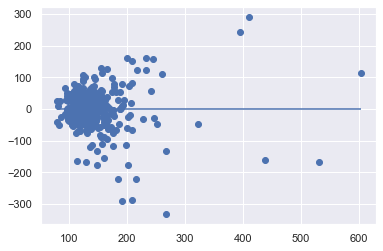

In [18]:
predictions = model2.predict(X) # not much different
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [19]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import pvalues
# create X and y
feature_cols = ['3+Dependent','Graduate','Rural']
X = newdataset_df[feature_cols]
y = newdataset_df.LoanAmount

# instantiate and fit
model3 = LinearRegression()
model3.fit(X, y)

# print the coefficients
list(zip(feature_cols, model3.coef_))

[('3+Dependent', 49.592587097397015),
 ('Graduate', 35.277577289944816),
 ('Rural', 5.897412412790847)]

In [20]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import pvalues
# create X and y
feature_cols = ['3+Dependent','Graduate']
X = newdataset_df[feature_cols]
y = newdataset_df.LoanAmount

# instantiate and fit
model4 = LinearRegression()
model4.fit(X, y)

# print the coefficients
list(zip(feature_cols, model4.coef_))

[('3+Dependent', 50.530314278643914), ('Graduate', 34.99936366528796)]

In [21]:
# Fitting our model with all of our features in X; initial R^2 low,possibly due to low "n"; will need to scale and optimize model
model4.fit(X, y)

score = model4.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.05593725927867499


In [22]:
#fitting polynokial regressionto the dataset
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
X_poly=poly.fit_transform(X)
poly.fit(X_poly, y)
lin2=LinearRegression()
lin2.fit(X_poly,y)

LinearRegression()

In [23]:
predictions = model2.predict(X) # not much different
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 2)

In [ ]:
#splitting dataset
X_train,X_val,y_train, y_val = train_test_split(X, y, test_size = 0.25,random_state=0)
print(X_train.shape,X_val.shape)

In [ ]:
y_train, y_val = y_train.to_numpy(), y_val.to_numpy()

In [ ]:
y_train.shape

adding polynomial features

In [ ]:
degree = 5
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
print(X_train_poly.shape)

Feature Scaling

In [ ]:
sc = StandardScaler()
sc.fit(X_train_poly)
X_train_scaled = sc.transform(X_train_poly)
X_val_scaled = sc.transform(X_val_poly)

In [ ]:
X_train_scaled[:5]

Training

In [ ]:
model2 = Ridge(alpha=10)
model2.fit(X_train_scaled,y_train)

In [ ]:
train_score = model2.score(X_train_scaled,y_train)
print("Train Score: ",train_score)

In [ ]:
val_score = model2.score(X_val_scaled,y_val)
print("Val Score: ",val_score)

Hyperparameter tuning

In [ ]:
params={}
params['degrees']=[1,2,3,4,5,6,7,8,9,10]
params['alpha'] = [0.01,0.1,10,50]

In [ ]:
def fit(X_train_scaled,y_train,X_val_scaled,y_val,degree,alpha,grid_search=False,exp_name=None):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    sc = StandardScaler()
    sc.fit(X_train_poly)
    X_train_scaled = sc.transform(X_train_poly)
    X_val_scaled = sc.transform(X_val_poly)

    model = Ridge(alpha)
    model.fit(X_train_scaled,y_train)

    train_score = model.score(X_train_scaled,y_train)
    val_score = model.score(X_val_scaled,y_val)
 
    if grid_search:
        scores = [exp_name, degree, alpha, train_score, val_score]
        return scores
    else:
        print('Train Score: ',train_score)
        print('Val Score: ',val_score)
        return model,poly,sc

In [ ]:
#!pip install tqdm
#from tqdm.notebook import tqdm

In [ ]:
#result=[]
#exp_id = 1
#for i in tqdm(range(len(params['degrees']))):
 #   degree = params['degrees'][i]
 #   for j in range(len(params['alpha'])):
 #       alpha = params['alpha'][j]
  #      exp_name='exp '+str(exp_id)
  #      exp_id+=1
  #      result.append(fit(X_train_scaled,y_train,X_val_scaled,y_val,degree,alpha,grid_search=True,exp_name=exp_name))
#result

In [ ]:
result_df=pd.DataFrame(result,columns=['Experiment_id','Degree','Alpha','Train Score','Val Score'])
result_df

In [ ]:
plt.figure(figsize=(10,5))
plt.title("R2 Score")
plt.plot(result_df['Train Score'],marker='o',label = 'Train Score')
plt.plot(result_df['Val Score'],marker='o', label = 'Val Score')
plt.xticks(list(range(len(result_df))),result_df['Experiment_id'],rotation=90)
plt.ylabel('Score')
plt.ylim((0.5,0.9))
plt.legend()
plt.show()

In [ ]:
result_df.sort_values(by='Val Score', ascending=False)

In [ ]:
result_df.loc[result_df['Experiment_id'] == 'exp 31']

Training the model on selected hyperparameters

In [ ]:
best_model,poly,sc = fit(X_train_scaled,y_train,X_val_scaled,y_val,degree=8,alpha=10)

Saving and loading model

In [ ]:
import joblib

In [ ]:
joblib.dump(best_model, 'best_model')
joblib.dump(poly, 'polynomial feature')
joblib.dump(sc, 'scaler')

In [ ]:
loaded_model = joblib.load('best_model')
poly = joblib.load('polynomial feature')
sc = joblib.load('scaler')

In [ ]:
def prediction(model,poly,sc):
    l=[]
    l.append(float(input('Enter Married: ')))
    l.append(float(input('Number of dependents: ')))
    l.append(float(input('setting Rural, semiurban or urban: ')))
    l.append(float(input('Income: ')))
    arr = np.asarray([l])
    arr = poly.transform(arr)
    scaled_arr = sc.transform(arr)
    print('Loan Amount: ', round(model.predict(scaled_arr)[0][0],2))

In [ ]:
prediction(loaded_model,poly,sc)